# Домашнее задание 2

По данным https://www.openml.org/d/35 вам предстоит научиться предсказывать одно из 6 заболеваний

# План
1. Проанализируйте данные. Обработайте все пропуски, nan'ы и inf'ы
2. Визуализируйте данные с помощью PCA и (или) t-SNE
3. Обучите различные линейные модели (Logistic Regression, SVM). Подберите наилучшие параметры и добейтесь наилучшей доли правильных ответов на предсказаниях
4. Визуализируйте предсказания модели, как на семинаре 2. Справляется ли этот класс классификаторов с данной задачей, или нужны другие методы (KNN?)

In [4]:
#1. Проанализируйте данные. Обработайте все пропуски, nan'ы и inf'ы
import pandas as pd

df = pd.read_csv('data/dataset_35_dermatology.csv')

In [5]:
df.isnull().any()

erythema                                    False
scaling                                     False
definite_borders                            False
itching                                     False
koebner_phenomenon                          False
polygonal_papules                           False
follicular_papules                          False
oral_mucosal_involvement                    False
knee_and_elbow_involvement                  False
scalp_involvement                           False
family_history                              False
melanin_incontinence                        False
eosinophils_in_the_infiltrate               False
PNL_infiltrate                              False
fibrosis_of_the_papillary_dermis            False
exocytosis                                  False
acanthosis                                  False
hyperkeratosis                              False
parakeratosis                               False
clubbing_of_the_rete_ridges                 False


In [6]:
df.isna().any()

erythema                                    False
scaling                                     False
definite_borders                            False
itching                                     False
koebner_phenomenon                          False
polygonal_papules                           False
follicular_papules                          False
oral_mucosal_involvement                    False
knee_and_elbow_involvement                  False
scalp_involvement                           False
family_history                              False
melanin_incontinence                        False
eosinophils_in_the_infiltrate               False
PNL_infiltrate                              False
fibrosis_of_the_papillary_dermis            False
exocytosis                                  False
acanthosis                                  False
hyperkeratosis                              False
parakeratosis                               False
clubbing_of_the_rete_ridges                 False


In [7]:
df.Age = pd.to_numeric(df.Age.replace('?', '-1'))
df.Age.unique() 

array([55,  8, 26, 40, 45, 41, 18, 57, 22, 30, 20, 21, 10, 65, 38, 23, 17,
       51, 42, 44, 33, 43, 50, 34, -1, 15, 46, 62, 35, 48, 12, 52, 60, 32,
       19, 29, 25, 36, 13, 27, 31, 28, 64, 39, 47, 16,  0,  7, 70, 37, 61,
       67, 56, 53, 24, 58, 49, 63, 68,  9, 75])

Projecting 34-dimensional data to 2D


Text(0.5, 1.0, 'Dermatology. PCA projection')

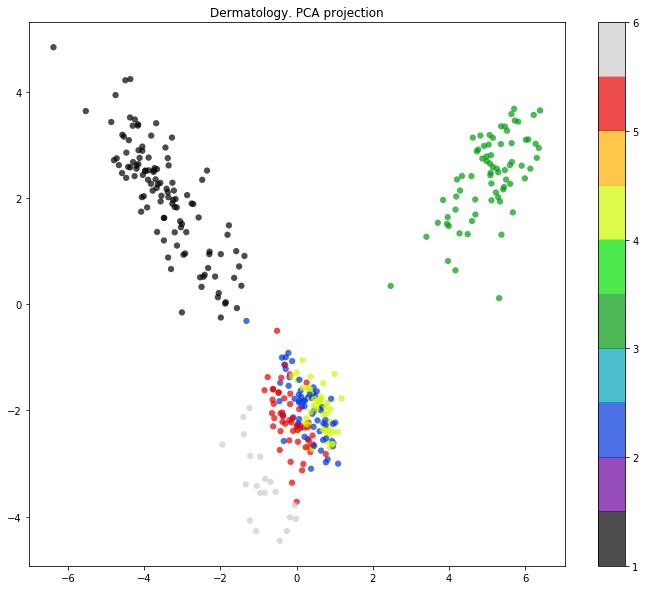

In [8]:
#2. Визуализируйте данные с помощью PCA и (или) t-SNE

# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X = pd.DataFrame(df, columns= df.columns.drop('class', 1))
y = df['class']

for col in X:
    ss = StandardScaler()
    X[col] = ss.fit_transform(X[[col]])
    
pca = PCA(n_components=2)
df_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(df_reduced[:, 0], df_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('Dermatology. PCA projection')


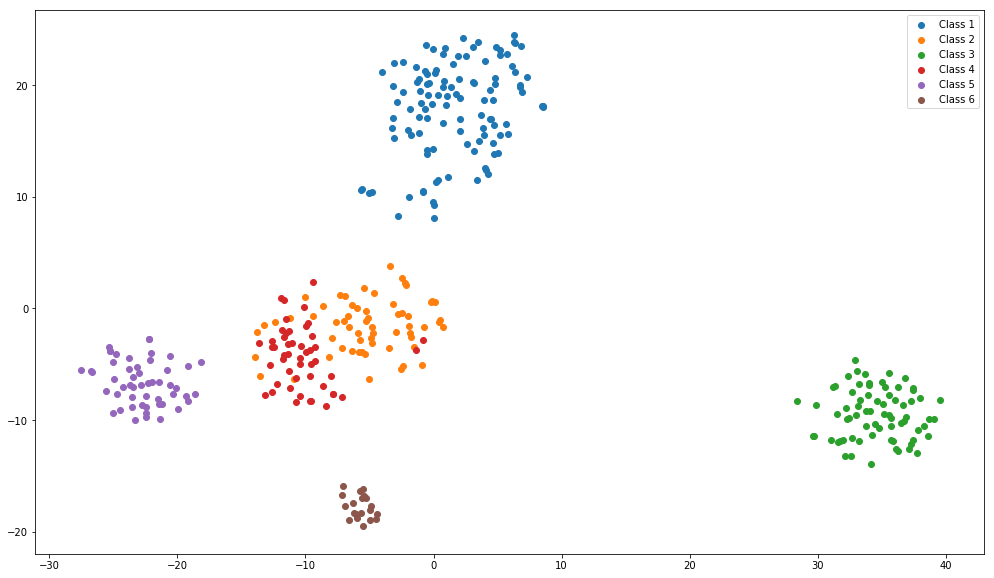

In [9]:
#t-SNE
%matplotlib inline
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

X_embedded = TSNE(n_components=2).fit_transform(X)

plt.figure(figsize=(17,10))
zeros_idx = np.argwhere(y == 1).squeeze() # номера тех объектов, чей класс 1
ones_idx = np.argwhere(y == 2).squeeze() # номера тех объектов, чей класс 2
two_idx = np.argwhere(y == 3).squeeze() # номера тех объектов, чей класс 3
three_idx = np.argwhere(y == 4).squeeze() # номера тех объектов, чей класс 4
five_idx = np.argwhere(y == 5).squeeze() # номера тех объектов, чей класс 5
six_idx = np.argwhere(y == 6).squeeze() # номера тех объектов, чей класс 6

plt.scatter(X_embedded[zeros_idx, 0], X_embedded[zeros_idx, 1], label='Class 1')
plt.scatter(X_embedded[ones_idx, 0], X_embedded[ones_idx, 1], label='Class 2')
plt.scatter(X_embedded[two_idx, 0], X_embedded[two_idx, 1], label='Class 3')
plt.scatter(X_embedded[three_idx, 0], X_embedded[three_idx, 1], label='Class 4')
plt.scatter(X_embedded[five_idx, 0], X_embedded[five_idx, 1], label='Class 5')
plt.scatter(X_embedded[six_idx, 0], X_embedded[six_idx, 1], label='Class 6')
plt.legend()



In [10]:
#3 Обучите различные линейные модели (Logistic Regression, SVM). !!! Это как ? У нас же только KNeighborsClassifier()
#  Подберите наилучшие параметры и добейтесь наилучшей доли правильных ответов на предсказаниях

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score

X_emb_train, X_emb_test, X_train,\
X_test, y_train, y_test = train_test_split(X_embedded, X, y, test_size=0.2, random_state=777)

base_clf = KNeighborsClassifier() # инициализируем базовый классификатор

params_grid = {
    'n_neighbors': list(range(1,30,2)), # Перебираем от 1 до 30 с шагом 2
    'weights': ['uniform', 'distance', lambda x: 1./x**2], # с каким весом берём каждого соседа. uniform - с одинаковым, distance - обратно пропорционально расстоянию. Ещё можно передать свою функцию
    'algorithm': ['auto'], # алгоритм поиска ближайших соседей. Влияет только на скорость обучения
    'leaf_size': [30], # параметры некоторых алгоритмов поиска ближ соседей. Влияет только на скорость обучения
    'metric': ['minkowski'], # метрика расстояния, используемая в алгоритме поиска ближайших соседей
    'p': [2] # параметр метрики, используемой в методе ближайших соседей 
}
gs = GridSearchCV(base_clf, params_grid, scoring='accuracy', cv=5) # cv - количество частей (K из рис. выше), verbose - выводить параметры во время обучения

gs.fit(X_train, y_train)

clf = gs.best_estimator_
y_pred = clf.predict(X_test)

print('Best score: {}'.format(gs.best_score_))
print('Best params: {}'.format(gs.best_params_))
print('Best estimator: {}'.format(accuracy_score(y_test, y_pred)))


Best score: 0.9691780821917808
Best params: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 9, 'p': 2, 'weights': <function <lambda> at 0x1a10e05400>}
Best estimator: 0.9459459459459459


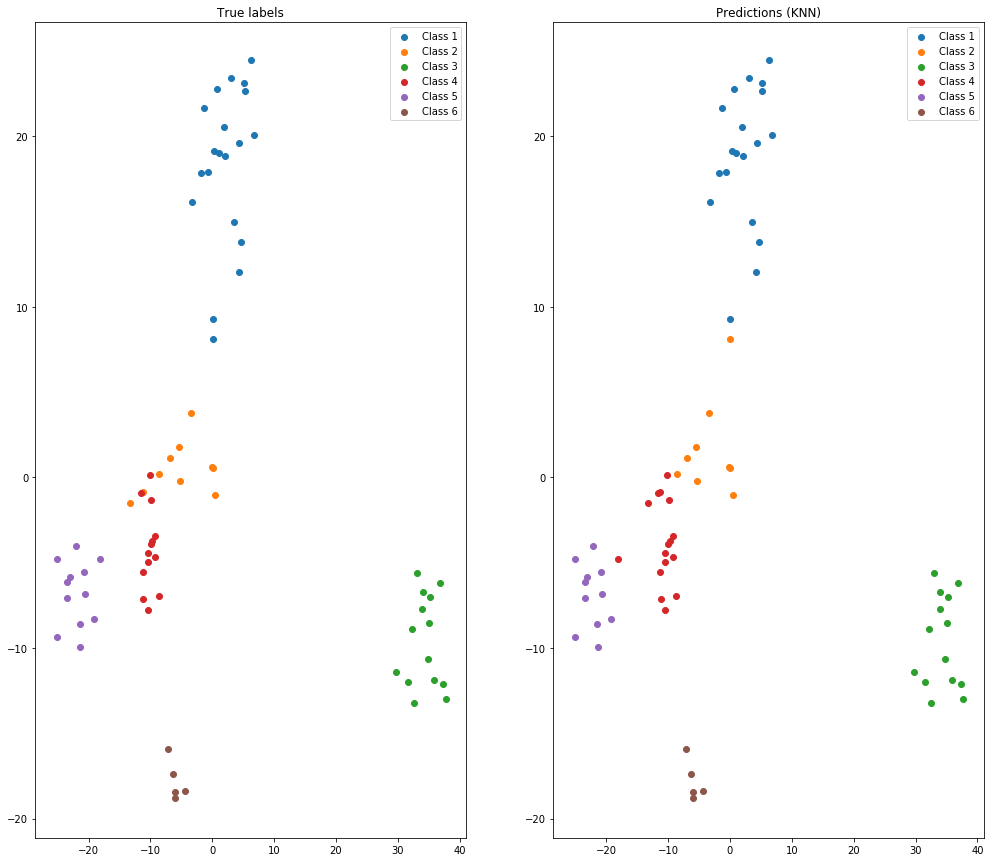

In [12]:
# Визуализируйте предсказания модели, как на семинаре 2. 

plt.figure(figsize=(17, 15))

plt.subplot(121)
plt.title('True labels')
zeros_idx = np.argwhere(y_test == 1).squeeze() # номера тех объектов, чей класс 1
ones_idx = np.argwhere(y_test == 2).squeeze() # номера тех объектов, чей класс 2
two_idx = np.argwhere(y_test == 3).squeeze() # номера тех объектов, чей класс 3
three_idx = np.argwhere(y_test == 4).squeeze() # номера тех объектов, чей класс 4
five_idx = np.argwhere(y_test == 5).squeeze() # номера тех объектов, чей класс 5
six_idx = np.argwhere(y_test == 6).squeeze() # номера тех объектов, чей класс 6

plt.scatter(X_emb_test[zeros_idx, 0], X_emb_test[zeros_idx, 1], label='Class 1')
plt.scatter(X_emb_test[ones_idx, 0], X_emb_test[ones_idx, 1], label='Class 2')
plt.scatter(X_emb_test[two_idx, 0], X_emb_test[two_idx, 1], label='Class 3')
plt.scatter(X_emb_test[three_idx, 0], X_emb_test[three_idx, 1], label='Class 4')
plt.scatter(X_emb_test[five_idx, 0], X_emb_test[five_idx, 1], label='Class 5')
plt.scatter(X_emb_test[six_idx, 0], X_emb_test[six_idx, 1], label='Class 6')
plt.legend()

plt.subplot(122)
plt.title('Predictions (KNN)')
zeros_idx = np.argwhere(y_pred == 1).squeeze() # номера тех объектов, чей статус 1
ones_idx = np.argwhere(y_pred == 2).squeeze() # номера тех объектов, чей статус 2
two_idx = np.argwhere(y_pred == 3).squeeze() # номера тех объектов, чей статус 3
three_idx = np.argwhere(y_pred == 4).squeeze() # номера тех объектов, чей статус 4
five_idx = np.argwhere(y_pred == 5).squeeze() # номера тех объектов, чей статус 5
six_idx = np.argwhere(y_pred == 6).squeeze() # номера тех объектов, чей статус 6

plt.scatter(X_emb_test[zeros_idx, 0], X_emb_test[zeros_idx, 1], label='Class 1')
plt.scatter(X_emb_test[ones_idx, 0], X_emb_test[ones_idx, 1], label='Class 2')
plt.scatter(X_emb_test[two_idx, 0], X_emb_test[two_idx, 1], label='Class 3')
plt.scatter(X_emb_test[three_idx, 0], X_emb_test[three_idx, 1], label='Class 4')
plt.scatter(X_emb_test[five_idx, 0], X_emb_test[five_idx, 1], label='Class 5')
plt.scatter(X_emb_test[six_idx, 0], X_emb_test[six_idx, 1], label='Class 6')
plt.legend()

